# The Singular Value Decomposition

Often more important in today's world than the eigenvalue decomposition.  Shows up in machine learning, image compression, and many discrete applications.

## Definition

For any $m \times n$ matrix $A$ of rank $r$:

$$A = U \Sigma V^T = \\
\begin{pmatrix} u_1 & \cdots & u_r & \cdots & u_m\end{pmatrix} \begin{pmatrix} \sigma_1 & & & & & \\ & \sigma_2 & & & & \\ & & \ddots & & & \\ & & & \sigma_r & & \\ & & & & 0 & \\ & & & & & \ddots \end{pmatrix} \begin{pmatrix} v_1 & \cdots & v_r & \cdots & v_n\end{pmatrix}^T \\
= \sigma_1 u_1 v_1^T + \cdots \sigma_r u_r v_r^T
$$

(more generally: $U \Sigma V^H$ for complex matrices)

* $U$ is $m\times m$ orthogonal (unitary) matrix of **left singular vectors** $u_k$
* $V$ is $n \times n$ orthogonal (unitary) of **right singular vectors** $v_k$
* $\Sigma$ is $m\times n$  diagonal matrix of r **singular values** (real) $\sigma_k > 0$ (and $n-r$ columns / $m-r$ rows of zeros)

The most basic SVD is a matrix decomposition of a matrix A into $U$ Diagonal($\sigma$) $V^T$, where $U$ and $V$ are  square orthogonal and $\sigma$ is a vector of decreasing singular
values that are non-negative. The notation $\Sigma$ denotes the diagonal matrix

$$
\Sigma = \begin{pmatrix}
\sigma_1 & 0 & \cdots \\
0 & \sigma_2 & \cdots \\
& & \ddots
\end{pmatrix}
$$

* The vectors $u_1, \ldots, u_r$ form an **orthonormal basis for the column space** $C(A)$, and $v_1, \ldots, v_r$ form an **orthonormal basis for the row space** $C(A^T)$.

### Square Example

In [1]:
A = randn(5,5)
U,σ,V = svd(A)
display(U), display(σ), display(V);

5×5 Array{Float64,2}:
 -0.837887  -0.00360708  -0.533729   0.073474    0.0875645
 -0.228281  -0.261529     0.496507   0.0438725   0.794385 
  0.263465  -0.530214    -0.299503   0.746685    0.047111 
 -0.298982  -0.682087     0.360215  -0.20127    -0.524502 
  0.295009  -0.430372    -0.499156  -0.628195    0.289765 

5-element Array{Float64,1}:
 3.09077 
 2.47409 
 1.99544 
 1.3849  
 0.093338

5×5 Array{Float64,2}:
  0.581876    0.486551   -0.194982   0.21415    -0.583789
  0.575104    0.0718241   0.386774  -0.669107    0.258454
 -0.499703    0.552859   -0.268021  -0.588264   -0.163567
  0.26899     0.0523952  -0.771478   0.0126204   0.574074
  0.0928225  -0.670605   -0.38128   -0.400278   -0.485876

In [2]:
σ
Σ = Diagonal(σ)

5×5 Diagonal{Float64}:
 3.09077   ⋅        ⋅        ⋅       ⋅      
  ⋅       2.47409   ⋅        ⋅       ⋅      
  ⋅        ⋅       1.99544   ⋅       ⋅      
  ⋅        ⋅        ⋅       1.3849   ⋅      
  ⋅        ⋅        ⋅        ⋅      0.093338

In [4]:
round.(U'U,2)

5×5 Array{Float64,2}:
  1.0  -0.0  -0.0  -0.0   0.0
 -0.0   1.0  -0.0  -0.0   0.0
 -0.0  -0.0   1.0  -0.0  -0.0
 -0.0  -0.0  -0.0   1.0  -0.0
  0.0   0.0  -0.0  -0.0   1.0

In [6]:
round.(V'V,2)

5×5 Array{Float64,2}:
  1.0   0.0   0.0  -0.0   0.0
  0.0   1.0   0.0   0.0  -0.0
  0.0   0.0   1.0  -0.0   0.0
 -0.0   0.0  -0.0   1.0  -0.0
  0.0  -0.0   0.0  -0.0   1.0

In [7]:
σ

5-element Array{Float64,1}:
 3.09077 
 2.47409 
 1.99544 
 1.3849  
 0.093338

In [8]:
Σ=Diagonal(σ)
U*Σ*V'

5×5 Array{Float64,2}:
 -1.28656     -1.9679      1.51341    0.130546   0.126973
 -0.948825    -0.0905405  -0.318564  -0.944703  -0.06968 
  0.170982    -0.547836   -1.58101    0.626952   0.767094
 -1.53004     -0.200789   -0.491876  -0.923142   0.907201
  0.00459912   0.651771   -0.269987   0.962445   1.51355 

In [9]:
A

5×5 Array{Float64,2}:
 -1.28656     -1.9679      1.51341    0.130546   0.126973
 -0.948825    -0.0905405  -0.318564  -0.944703  -0.06968 
  0.170982    -0.547836   -1.58101    0.626952   0.767094
 -1.53004     -0.200789   -0.491876  -0.923142   0.907201
  0.00459912   0.651771   -0.269987   0.962445   1.51355 

### "tall-skinny" full column rank example

In [4]:
A = randn(5,3)
U,σ,V = svd(A,thin=false) # thin=false gives the basic svd, 
                          # often the default (thin=true) is more useful
display(U), display(σ), display(V);

5×5 Array{Float64,2}:
 -0.295069   0.524511   0.116294  0.216986   0.759747  
 -0.17686   -0.480732   0.640376  0.572305   0.00172267
 -0.53255    0.407726  -0.212582  0.417509  -0.575018  
  0.383103  -0.194802  -0.60993   0.636647   0.194809  
  0.671772   0.538142   0.398985  0.213893  -0.23278   

3-element Array{Float64,1}:
 3.47777
 1.94077
 1.13201

3×3 Array{Float64,2}:
 -0.915755   0.0299677  -0.400617
  0.38762    0.327941   -0.861513
  0.105561  -0.944223   -0.31193 

In [5]:
Σ = zeros(A) # Make Σ the size of A
for i=1:length(σ) Σ[i,i]=σ[i] end # put the singular values on the diagonal

display(A)
U*Σ*V'

5×3 Array{Float64,2}:
  0.9175    -0.177354  -1.11057 
  0.244891  -1.1689     0.589902
  1.81618   -0.251088  -0.867612
 -0.954827   0.987286   0.712994
 -2.28909    0.858984  -0.880423

5×3 Array{Float64,2}:
  0.9175    -0.177354  -1.11057 
  0.244891  -1.1689     0.589902
  1.81618   -0.251088  -0.867612
 -0.954827   0.987286   0.712994
 -2.28909    0.858984  -0.880423

In [ ]:
Σ

### short fat matrix

In [6]:
A = randn(3,5)
U,σ,V = svd(A,thin=false) # thin=false gives the basic svd, 
                          # often the default (thin=true) is more useful
display(U), display(σ), display(V)
Σ = zeros(A) # Make Σ the size of A
for i=1:length(σ) Σ[i,i]=σ[i] end # put the singular values on the diagonal
U*Σ*V'
A

3×3 Array{Float64,2}:
 -0.568528  -0.728401  -0.382373
  0.732342  -0.659857   0.168117
 -0.374768  -0.184448   0.908586

3-element Array{Float64,1}:
 2.04826 
 1.45171 
 0.628441

5×5 Array{Float64,2}:
 -0.058333   -0.324256  -0.802831  -0.218627   -0.446229 
  0.0418722  -0.121676  -0.292301   0.935612    0.150438 
  0.815484   -0.534919   0.206087  -0.0297624  -0.0740988
 -0.504176   -0.535458   0.46349    0.172218   -0.46326  
 -0.275022   -0.554256  -0.112819  -0.215144    0.747093 

3×5 Array{Float64,2}:
  0.603724   0.150143  -0.433508   1.04194   0.933455
  0.138289   0.148483   1.75743   -0.194381  0.106473
 -0.326809  -0.166463  -0.365076   0.795042  0.295105

In [7]:
A

3×5 Array{Float64,2}:
  0.603724   0.150143  -0.433508   1.04194   0.933455
  0.138289   0.148483   1.75743   -0.194381  0.106473
 -0.326809  -0.166463  -0.365076   0.795042  0.295105

In [ ]:
Σ

Thin: for tall skinny, U is the size of A, Σ is square <br>
Thin: for short fat, V is the size of A, Σ is square 

In [ ]:
A = randn(5,3)
U,σ,V = svd(A) # thin = true
display(U)
display(round(U'U,2))
display(A)
U*Diagonal(σ)*V'

In [ ]:
A = randn(3,5)
U,σ,V = svd(A)
display(V)
display(round(V'V,2))
display(A)
U*Diagonal(σ)*V'

## Data "compression"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  111k  100  111k    0     0  1248k      0 --:--:-- --:--:-- --:--:-- 1253k


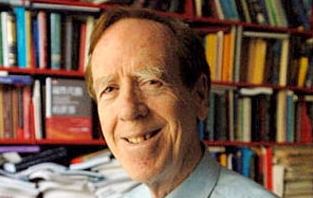

In [7]:
using Images, Interact
picture = download("http://web.mit.edu/jfrench/Public/gstrang.png")
pimage = load(picture)

In [8]:
p = Float64.(channelview(pimage)) # convert to an array

3×198×313 Array{Float64,3}:
[:, :, 1] =
 0.501961  0.407843  0.27451   0.152941  …  0.811765  0.729412  0.690196
 0.576471  0.466667  0.282353  0.129412     0.776471  0.686275  0.631373
 0.592157  0.454902  0.270588  0.137255     0.788235  0.701961  0.611765

[:, :, 2] =
 0.478431  0.4       0.278431  0.156863  …  0.792157  0.717647  0.67451 
 0.560784  0.462745  0.298039  0.133333     0.74902   0.670588  0.607843
 0.572549  0.45098   0.27451   0.141176     0.764706  0.686275  0.576471

[:, :, 3] =
 0.47451   0.403922  0.298039  0.168627  …  0.788235  0.717647  0.67451 
 0.556863  0.478431  0.317647  0.145098     0.741176  0.670588  0.603922
 0.560784  0.454902  0.294118  0.145098     0.74902   0.678431  0.564706

...

[:, :, 311] =
 0.180392  0.14902   0.14902   0.145098  …  0.521569  0.576471  0.627451
 0.203922  0.211765  0.211765  0.160784     0.431373  0.529412  0.588235
 0.196078  0.2       0.211765  0.196078     0.258824  0.333333  0.447059

[:, :, 312] =
 0.160784  0.12549   0.

In [9]:
pr,pg,pb = p[1,:,:],p[2,:,:],p[3,:,:]
Ur,σr,Vr = svd(pr)
Ug,σg,Vg = svd(pg)
Ub,σb,Vb = svd(pb)

([-0.0425341 -0.0450356 … 0.00151963 0.00756285; -0.0404302 -0.0474975 … 0.018155 -0.0318043; … ; -0.143038 0.101536 … 0.0478258 -0.031868; -0.144002 0.111713 … 0.00208723 -0.00647907], [85.0721, 21.0869, 16.5932, 14.0062, 11.7329, 10.1639, 9.09968, 7.38199, 7.21165, 6.61043  …  0.0242461, 0.022777, 0.0226532, 0.0215465, 0.0208984, 0.0198099, 0.019109, 0.0189211, 0.0177043, 0.0170277], [-0.0697386 -0.0166765 … -0.00833632 -0.00208403; -0.0695657 -0.0410425 … 0.0132635 0.0545603; … ; -0.0231986 -0.00117247 … 0.00208234 -0.0117437; -0.0217245 0.00349056 … 0.0677007 0.0426431])

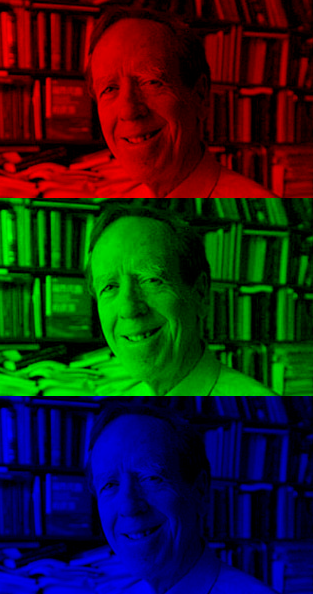

In [10]:
[colorview(RGB,pg,0*pg,0*pg);colorview(RGB,0*pg,pg,0*pg);colorview(RGB,0*pg,0*pg,pg)]

In [11]:
# Pkg.add("Plots")
# Pkg.build("PlotlyJS")

In [12]:
using Plots
plotly()

Plots.PlotlyBackend()

In [48]:
plot(σr,   color=:red,     yaxis=:log, legend=false)
plot!(σg,  color=:green, yaxis=:log)
plot!(σb,  color=:blue,  yaxis=:log)

In [19]:
using Interact

Interact.Slider{Int64}(5: "input-2" = 1 Int64 , "", 1, 1:40, "horizontal", true, "d", true)

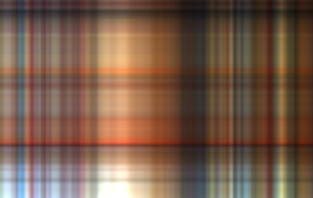

In [50]:
@manipulate for k=slider(1:40,value=1)
    p̂r = Ur[:,1:k]*Diagonal(σr[1:k])*Vr[:,1:k]'
    p̂g = Ug[:,1:k]*Diagonal(σg[1:k])*Vg[:,1:k]'
    p̂b = Ub[:,1:k]*Diagonal(σb[1:k])*Vb[:,1:k]'
    img = colorview(RGB, p̂r,p̂g,p̂b) 
end

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   552  100   552    0     0   5243      0 --:--:-- --:--:-- --:--:--  5257
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13533  100 13533    0     0   135k      0 --:--:-- --:--:-- --:--:--  136k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12257  100 12257    0     0    99k      0 --:--:-- --:--:-- --:--:--  100k


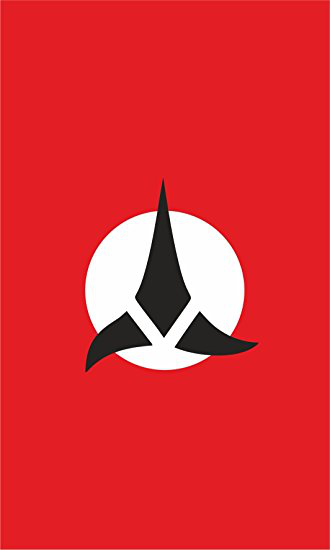

In [51]:
pics = Dict{String,Array}()
pics["Ireland"] = ImageMagick.load(download("https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Flag_of_Ireland.svg/500px-Flag_of_Ireland.svg.png"))
pics["USA"] = ImageMagick.load(download("https://upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/640px-Flag_of_the_United_States.svg.png"))
pics["Klingon"] = ImageMagick.load(download("https://images-na.ssl-images-amazon.com/images/I/51ibu5dAb9L._SY550_.jpg"))

Interact.Options{:ToggleButtons,String}(9: "input-3" = USA String , "flag", "USA", "USA", 1, Interact.OptionDict(DataStructures.OrderedDict("USA"=>"USA","Ireland"=>"Ireland","Klingon"=>"Klingon"), Dict("USA"=>"USA","Ireland"=>"Ireland","Klingon"=>"Klingon")), Any[], Any[], true, "horizontal", true)

Interact.Slider{Int64}(11: "input-4" = 1 Int64 , "", 1, 1:40, "horizontal", true, "d", true)

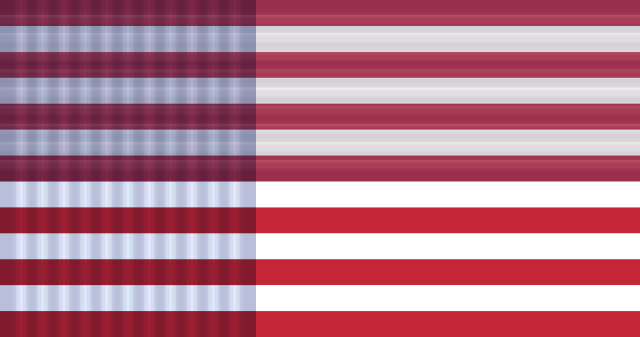

In [52]:

@manipulate for flag in collect(keys(pics)), k=slider(1:40,value=1)
    p = float.(channelview(pics[flag])) # convert to an array
    pr,pg,pb = p[1,:,:],p[2,:,:],p[3,:,:]
    Ur,σr,Vr = svd(pr)
    Ug,σg,Vg = svd(pg)
    Ub,σb,Vb = svd(pb)
    p̂r = Ur[:,1:k]*Diagonal(σr[1:k])*Vr[:,1:k]'
    p̂g = Ug[:,1:k]*Diagonal(σg[1:k])*Vg[:,1:k]'
    p̂b = Ub[:,1:k]*Diagonal(σb[1:k])*Vb[:,1:k]'
    colorview(RGB, p̂r,p̂g,p̂b) 
end

Moral of the story:  if k is large enough
    U[:,1:k] * Diagonal(sigma(1:k)) * V[:,1:k]'
    is a good approsimation to A often requiring less storage and less computation

let $u=$Ur[:,1:1], that is the first column of Ur <br>
let $v=$Vr[:,1:1], that is the first column of Vr <br>
let $\sigma$  be the first sing value: Diagonal(σr[1:k])

Consider $u*\sigma*v'$

Now consider k=2 and we now have
$u_1*\sigma_1*v_1' + u_2*\sigma_2*v_2'$


# What happens when a matrix has low rank?

The four fundamental subspaces done nicely --- could have been an early lecture if we accepted the existence of the SVD

U  contains a basis for the column space and the left nullspace.

V contains a basis for the row space and the nullspace.

## The svd not as an eigenproblem

In [53]:
A = eye(5)
svdvals(A)

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [54]:
A = Diagonal(randn(5))

5×5 Diagonal{Float64}:
 1.50894    ⋅          ⋅          ⋅         ⋅      
  ⋅       -0.887093    ⋅          ⋅         ⋅      
  ⋅         ⋅        -0.375186    ⋅         ⋅      
  ⋅         ⋅          ⋅        -0.303804   ⋅      
  ⋅         ⋅          ⋅          ⋅        0.521404

In [55]:
svdvals(A) # absolute value of diagonals
# svdvals always are in monotonically non-increasing order

5-element Array{Float64,1}:
 1.50894 
 0.887093
 0.521404
 0.375186
 0.303804

In [56]:
Q,_ = qr(randn(5,5))

([-0.721036 0.26185 … -0.369539 -0.151587; -0.51164 0.0128391 … 0.745438 -0.315294; … ; -0.0347256 -0.757165 … 0.267797 0.128; 0.390787 0.563416 … 0.444827 -0.0807078], [1.72753 0.558676 … -2.02778 -1.01198; 0.0 -2.09858 … -0.68639 0.107857; … ; 0.0 0.0 … -0.449368 0.727321; 0.0 0.0 … 0.0 1.75886])

In [57]:
Q'Q

5×5 Array{Float64,2}:
  1.0           0.0          -5.55112e-17  0.0           3.46945e-17
  0.0           1.0          -1.11022e-16  1.66533e-16  -1.31839e-16
 -5.55112e-17  -1.11022e-16   1.0          1.66533e-16   4.02456e-16
  0.0           1.66533e-16   1.66533e-16  1.0           5.6205e-16 
  3.46945e-17  -1.31839e-16   4.02456e-16  5.6205e-16    1.0        

In [58]:
svdvals(Q)
# Q = Q * (Σ=I) * (V=I)'

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [59]:
D = Diagonal(randn(5))

5×5 Diagonal{Float64}:
 -0.533368   ⋅          ⋅        ⋅         ⋅      
   ⋅        0.720923    ⋅        ⋅         ⋅      
   ⋅         ⋅        -1.37832   ⋅         ⋅      
   ⋅         ⋅          ⋅       1.37687    ⋅      
   ⋅         ⋅          ⋅        ⋅       -0.137221

In [60]:
svdvals(Q*D)

5-element Array{Float64,1}:
 1.37832 
 1.37687 
 0.720923
 0.533368
 0.137221

In [61]:
svdvals(D*Q)

5-element Array{Float64,1}:
 1.37832 
 1.37687 
 0.720923
 0.533368
 0.137221

## The SVD as an eigenproblem

In [ ]:
# Notice if A = U Σ V' then
# A'A = U Σ V'V Σ' U'
# A'A = V Σ² V'
# A*A' = U Σ² U'

Notice that the EIGENVALUES of A'A are the squares
of the singular values, and the EIGENVECTORS are the
RIGHT singular vectors of A <br>

Notice that the EIGENVALUES of A*A' are the squares
of the singular values, and the EIGENVECTORS are the
LEFT singular vectors of A <br>


In [24]:
A = randn(5,3)

5×3 Array{Float64,2}:
 -0.168271  -0.339852  -2.04547  
  1.18993    0.283447  -0.863771 
 -0.272325  -0.514321  -0.329903 
 -0.394661   0.617962   0.0820683
  0.22752    0.969223   0.433193 

In [25]:
svdvals(A).^2 |> sort

3-element Array{Float64,1}:
 0.933419
 2.22308 
 5.58433 

In [26]:
eigvals(A'A) |> sort

3-element Array{Float64,1}:
 0.933419
 2.22308 
 5.58433 

In [27]:
eigvals(A*A') |> sort

5-element Array{Float64,1}:
 -5.84712e-16
 -1.64689e-16
  0.933419   
  2.22308    
  5.58433    

In [ ]:
U,σ,V = svd(A)

In [ ]:
E,X = eig(A'A)
display(X)

In [ ]:
V[:,5:-1:1]

In [ ]:
E,X = eig(A*A')
display(X)

In [ ]:
U[:,5:-1:1]

How many parameters are there "REALLY" in an n x n orthogonal matrix Q?

The answer is $n(n-1)/2$ (or "n choose 2")

one can easily check there are $n(n+1)/2$ constraints in $Q^T Q=I$:

In [ ]:
n(n-1)/2 + n + n(n-1)/2 